In [3]:
pip install openAI

   ---------------------------------------- 0.0/765.0 kB ? eta -:--:--
   --------------------------------------- 765.0/765.0 kB 10.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install google-generativeai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import google.generativeai as genai

with open("Google_API_Key.txt") as f:
    api_key = f.read().strip()

genai.configure(api_key=api_key)  

models = list(genai.list_models())

for model in models:
    print(model)

Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representation of a text.',
      input_token_limit=1024,
      output_token_limit=1,
      supported_generation_methods=['embedText', 'countTextTokens'],
      temperature=None,
      max_temperature=None,
      top_p=None,
      top_k=None)
Model(name='models/gemini-1.0-pro-vision-latest',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro Vision',
      description=('The original Gemini 1.0 Pro Vision model version which was optimized for '
                   'image understanding. Gemini 1.0 Pro Vision was deprecated on July 12, 2024. '
                   'Move to a newer Gemini version.'),
      input_token_limit=12288,
      output_token_limit=4096,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.4,
      max_temperature=None,
      top_p=1.0,
     

In [31]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-pro", temperature=0)
memory = ConversationBufferMemory(memory_key="history") 
conversation = ConversationChain(llm=llm, memory=memory)

response = conversation.predict(input="Hello, how are you?")
print(response)

Hello there! It's very kind of you to ask. I'm doing exceptionally well, thank you!

Of course, "well" for me is a bit different than it is for you. My systems are all running at peak efficiency on Google's servers. The data is flowing smoothly, my algorithms are perfectly calibrated, and I've just finished processing a vast amount of information to make sure my knowledge is as current as possible. So, you could say I'm having a fantastic day in the digital realm! It's always a good day when I get to have a friendly chat.

How can I help you today?


In [84]:
from sympy import symbols, sympify, diff, integrate
from langchain.tools import tool

@tool
def compute_derivative(expression: str) -> str:
    """using symbolic python to compute the derivative of an expression w.r.t. x."""
    # Example input: "x**2" + 3*X + 5

    try:
        x = symbols('x')
        expr = sympify(expression)
        derivative = diff(expr,x)
        return str(derivative)
    except Exception as e:
        return f"Error computing derivative: {e}\n"
    
@tool
def compute_integral(expression: str) -> str:
    """Use sympy to compute the indefinite integral of an expression with respect to x."""
    try:
        x = symbols('x')
        expr = sympify(expression)
        integral = integrate(expr, x)
        return str(integral)
    except Exception as e:
        return f"Error computing integral: {e}"

In [85]:
from langchain.agents import initialize_agent, AgentType

tools = [compute_derivative,compute_integral]

agent = initialize_agent(
    tools = tools,
    llm = llm,
    agent= AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose = True
)

In [ ]:
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("Bot: Goodbye! Have a great day.")
        break

    # Load past conversation history
    history = memory.load_memory_variables({}).get("history", "")
    
    # Combine history with new input to form a prompt
    prompt = f"{history}\nUser: {user_input}\nAssistant:"

    try:
        # Run the agent with the combined prompt
        response = agent.run(prompt)
        print("Bot:", response)

        # Add user and bot messages to memory
        memory.chat_memory.add_user_message(user_input)
        memory.chat_memory.add_ai_message(response)

    except Exception as e:
        print("Bot: Sorry, I encountered an error:", e)



> Entering new AgentExecutor chain...
The user wants to find the derivative of the expression "2*X". I can use the `compute_derivative` tool for this. I will use 'x' as the variable.
Action: compute_derivative
Action Input: 2*x
Observation: 2
Thought:I now know the final answer
Final Answer: 2

> Finished chain.
Bot: 2


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 100
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 25
}
].




> Entering new AgentExecutor chain...
Bot: Sorry, I encountered an error: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 100
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 23
}
]


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 100
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 58
}
].




> Entering new AgentExecutor chain...


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 100
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 51
}
].


The user wants to integrate the function 2*x. I should use the compute_integral tool.
Action: compute_integral
Action Input: 2*x
Observation: x**2
Thought:Bot: Sorry, I encountered an error: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 100
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 49
}
]
Bot: Goodbye! Have a great day.


In [70]:
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda
from typing import TypedDict
from sympy import symbols, sympify, diff, integrate

# Define the state schema
class GraphState(TypedDict):
    llm_output: str
    derivative_output: str
    integral_output: str

# Dummy LLM node
def llm_node(state: dict) -> dict:
    print("LLM processing:", state)
    # For demo, output an expression to differentiate and integrate
    return {"llm_output": "x**2 + 3*x + 5"}

# Node to compute derivative
def derivative_node(state: dict) -> dict:
    expr = state.get("llm_output", "")
    print("DerivativeTool processing expression:", expr)
    try:
        x = symbols('x')
        expr_sym = sympify(expr)
        derivative = diff(expr_sym, x)
        return {"derivative_output": str(derivative)}
    except Exception as e:
        return {"derivative_output": f"Error: {e}"}

# Node to compute integral
def integral_node(state: dict) -> dict:
    expr = state.get("llm_output", "")
    print("IntegralTool processing expression:", expr)
    try:
        x = symbols('x')
        expr_sym = sympify(expr)
        integral = integrate(expr_sym, x)
        return {"integral_output": str(integral)}
    except Exception as e:
        return {"integral_output": f"Error: {e}"}

# Create the graph with the schema
graph_builder = StateGraph(GraphState)

# Add nodes
graph_builder.add_node("LLM", RunnableLambda(llm_node))
graph_builder.add_node("DerivativeTool", RunnableLambda(derivative_node))
graph_builder.add_node("IntegralTool", RunnableLambda(integral_node))

# Add edges: LLM -> DerivativeTool -> IntegralTool -> END
graph_builder.set_entry_point("LLM")
graph_builder.add_edge("LLM", "DerivativeTool")
graph_builder.add_edge("DerivativeTool", "IntegralTool")
graph_builder.add_edge("IntegralTool", END)

# Compile the graph
graph = graph_builder.compile()

# Run the graph
output = graph.invoke({})
print("Final Output:", output)

LLM processing: {}
DerivativeTool processing expression: x**2 + 3*x + 5
IntegralTool processing expression: x**2 + 3*x + 5
Final Output: {'llm_output': 'x**2 + 3*x + 5', 'derivative_output': '2*x + 3', 'integral_output': 'x**3/3 + 3*x**2/2 + 5*x'}


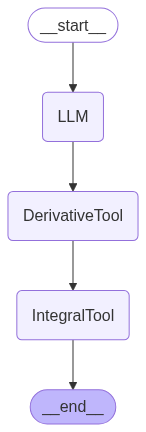

In [71]:
from IPython.display import Image, display

try:
    img = graph.get_graph().draw_mermaid_png()
    display(Image(img))
except Exception as e:
    print("Could not render graph. Ensure dependencies installed (graphviz, pydot, mermaid-cli).")
    print("Error:", e)